In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

# c-chart

- https://en.wikipedia.org/wiki/C-chart (last accessed: 28 March 2020)
- https://support.minitab.com/en-us/minitab/19/help-and-how-to/quality-and-process-improvement/control-charts/how-to/attributes-charts/c-chart/methods-and-formulas/methods-and-formulas/ (last accessed: 19 April 2020)

Number of defectives for subgroup $i$: $x_{i}$

Total number of defectives: $\Sigma x_{i}$

Number of subgroups: $m$

Process mean: $c$

Central line: $\mu = \bar{c} = \dfrac{\Sigma x_{i}}{m}$ (if not specified)

Standard deviation: $\sigma = \sqrt{c}$

Upper control line: $UCL_{c} = c + 3\cdot\sqrt{c}$

Lower control line: $LCL_{c} = c - 3\cdot\sqrt{c}$ or $LCL_{c} = 0$

Plotted statistics: $x_{i}$

Description:

The c chart is an attribute control chart used to study the number of nonconformities or defects. Often, information about the types of nonconformities is collected on the same chart to help determine the causes of variation.

Also called: count chart

In [2]:
def read_data(path):
    return pd.read_csv(path)

# Read the data
path = r'data\cchart_data.csv'
cdata = read_data(path)
cdata.head()

,Observation,Defective samples
0,1,4
1,2,2
2,3,5
3,4,1
4,5,6


In [3]:
# Clean data
del cdata['Observation']
cdata.head()

,Defective samples
0,4
1,2
2,5
3,1
4,6


In [4]:
def compute_parameters(num_defectives, c=None):
    # Compute the center line c_bar
    if c is None:
        c = num_defectives.mean()
    
    # Compute the upper and lower control limit
    ucl = c + 3*np.sqrt(c)
    ucl_mean = ucl.mean()
    
    lcl = c - 3*np.sqrt(c)
    lcl = np.maximum(lcl, 0)
    lcl_mean = lcl.mean()
    
    return c, ucl, lcl, ucl_mean, lcl_mean
    
c, ucl, lcl, ucl_mean, lcl_mean = compute_parameters(cdata['Defective samples'], c=4)
cbar, uclbar, lclbar, uclbar_mean, lclbar_mean = compute_parameters(cdata['Defective samples'])

print(f'c: {c:.4f}')
print(f'Lower control limit: {lcl}')
print(f'Upper control limit: {ucl}')
print(f'Mean of lower control limit:{lcl_mean:.4f}')
print(f'Mean of upper control limit:{ucl_mean:.4f}')
print('\n')
print(f'cbar: {cbar:.4f}')
print(f'Lower control limit: {lclbar}')
print(f'Upper control limit: {uclbar}')
print(f'Mean of lower control limit:{lclbar_mean:.4f}')
print(f'Mean of upper control limit:{uclbar_mean:.4f}')

c: 4.0000
Lower control limit: 0.0
Upper control limit: 10.0
Mean of lower control limit:0.0000
Mean of upper control limit:10.0000


cbar: 4.3600
Lower control limit: 0.0
Upper control limit: 10.624183905346332
Mean of lower control limit:0.0000
Mean of upper control limit:10.6242


In [5]:
# Plot the c-chart
def plot_cchart(x_axis, y_axis, mu, ucl, lcl, ucl_mean, lcl_mean, title, x_label, y_label):
    plt.style.use('seaborn')
    fig, ax = plt.subplots()

    ax.plot(x_axis, y_axis, 'o-', c='red')

    mu_line = mu*np.ones(x_axis.size)
    ax.plot(mu_line, c='yellow', label=f'Central line={mu:.4f}')

    ucl_line = ucl*np.ones(x_axis.size)
    ax.plot(ucl_line, c='green', label=f'Upper control limit={ucl_mean:.4f}')

    lcl_line = lcl*np.ones(x_axis.size)
    ax.plot(lcl_line, c='blue', label=f'Lower control limit={lcl_mean:.4f}')

    ax.set_xticks(np.arange(x_axis.size))
    
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    ax.set_title(title, fontsize=25)
    
    ax.set_xlabel(x_label, fontsize=15)
    
    ax.set_ylabel(y_label, fontsize=15)

C:\Users\PC\AppData\Local\Temp\ipykernel_5788\1855323046.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


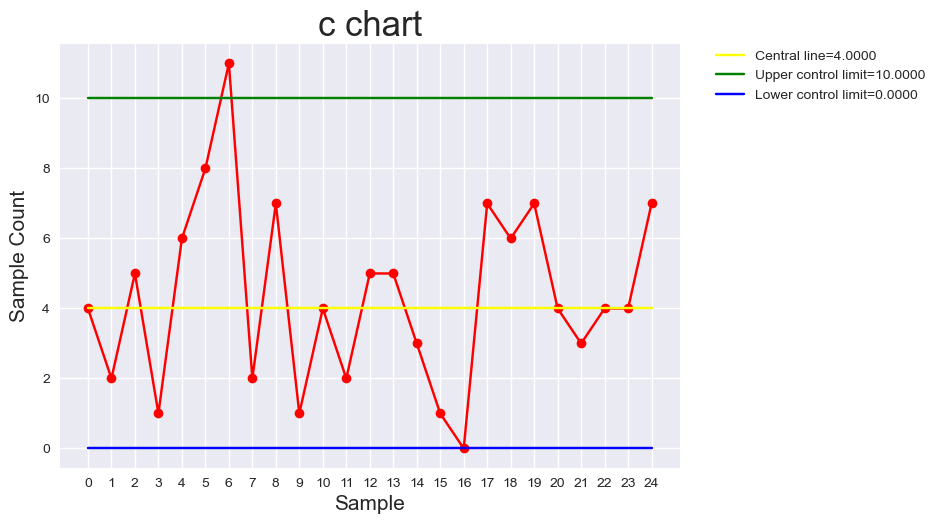

In [6]:
# With predefined c-value
plot_cchart(x_axis=cdata.index, y_axis=cdata['Defective samples'], mu=c, ucl=ucl, lcl=lcl, ucl_mean=ucl_mean, lcl_mean=lcl_mean, title=r'c chart', x_label=r'Sample', y_label='Sample Count')

c control chart generated in Minitab 17 for comparison:

<img src="minitab\cchart_predefined.png" width="500" height="500" align="center"/>

**Analysis**:
- The code is correct; the chart is correctly reproduced.
- There is one point beyond the upper control limit. Test failed at point 7. The process is out of statistical control.

C:\Users\PC\AppData\Local\Temp\ipykernel_5788\1855323046.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


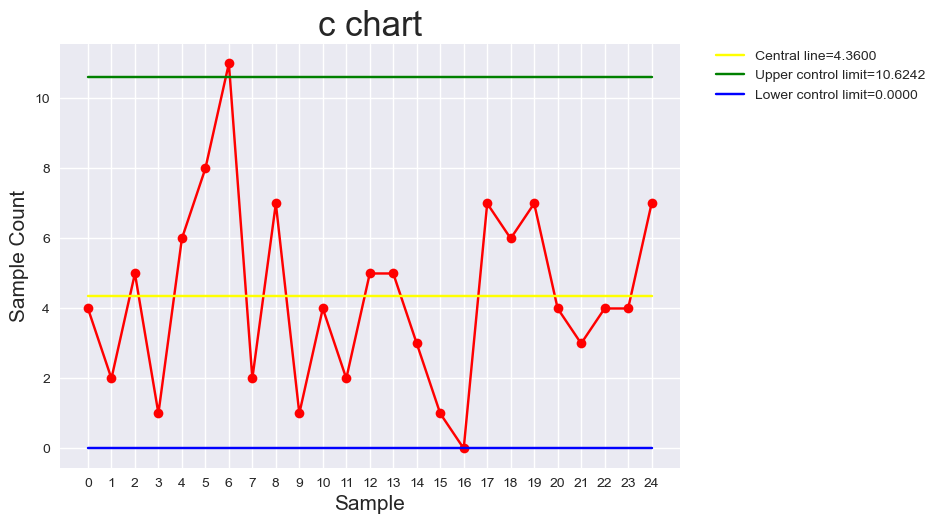

In [7]:
# Without predefined c-value
plot_cchart(x_axis=cdata.index, y_axis=cdata['Defective samples'], mu=cbar, ucl=uclbar, lcl=lclbar, ucl_mean=uclbar_mean, lcl_mean=lclbar_mean, title=r'c chart', x_label=r'Sample', y_label='Sample Count')

c control chart generated in Minitab 17 for comparison:

<img src="minitab\cchart.png" width="500" height="500" align="center"/>

**Analysis**:
- The code is correct; the chart is correctly reproduced.
- There is one point beyond the upper control limit. Test failed at point 7. The process is out of statistical control.